# Loan Approval Prediction

## Data Description

In this project the dataset given consisits of details of applicants who applied for loan. It includes details like credit history, loan amount, income and other dependent attributes.

The problem here is classification problem and we need to build a model to predict whether the loan of applicant will be approved or not on the basis of detail provided.

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_csv(r"loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

##### Independent Variables:

- Loan_ID : Unique Loan ID

- Gender : Male/Female

- Married : Yes/No

- Dependents : Number of depandents

- Education : Applicants Education(Graduate/UnderGraduate)

- Self_Employed : Yes/No

- ApplicantIncome : Income of Applicant

- CoapplicantIncome : Income of Coapplicant

- Loan_Amount : Loan amount in thousands

- Loan_Amount_Term : Term of loan in months

- Credit History : Credit history meets guidelines

- Property_Area : Urban/ Semi-urban/ rural

##### Dependent Variable (Target Variable):

- Loan_Status : Yes/No

## EDA

In [4]:
df.shape

(614, 13)

No. of rows= 614

No. of columns= 13

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Our data consists of data types both numeric and object. Also it consists of null values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Columns having null values are gender, married, dependents, self employed, Loan amount, Loan amount term and credit history.

We'll now check for duplicate data.

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(614, 13)

There was no duplicate data

We'll now drop rows if any of them has more than 4 columns as null 

In [9]:
df.dropna(axis=0, thresh=4,inplace=True)

In [10]:
df.shape

(614, 13)

We'll Now fill null values as we don't want to lose much of our data but first we will look into data more deeply

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We'll Now replace null values with mode in categorical data whereas mean for continuous data to move forewad with our data.

In [12]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
df["Dependents"].fillna(value=df["Dependents"][0],inplace=True)

In [15]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [16]:
df["Gender"].fillna(value="Male",inplace=True)

In [17]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
df["Self_Employed"].fillna(value="No",inplace=True)

In [19]:
df["LoanAmount"].fillna(value=df["LoanAmount"].mean(),inplace=True)

In [20]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [21]:
df["Loan_Amount_Term"].fillna(value=360,inplace=True)

In [22]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [23]:
df["Credit_History"].fillna(value=1.0,inplace=True)

In [24]:
df.dropna(subset=["Married"],inplace=True)

### Univariate Analysis

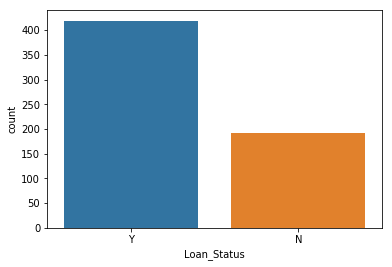

In [25]:
sns.countplot(x="Loan_Status",data=df)

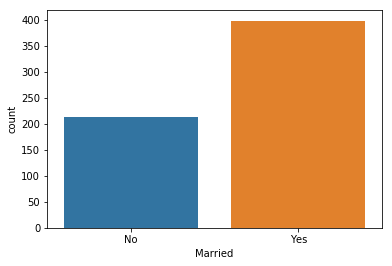

In [26]:
sns.countplot(x="Married",data=df)

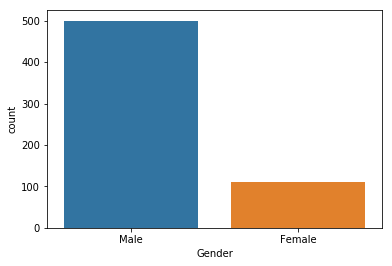

In [27]:
sns.countplot(x="Gender",data=df)

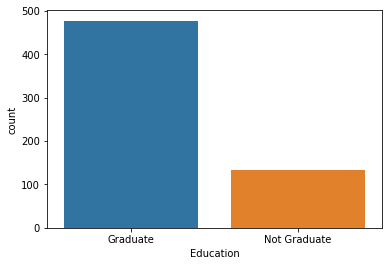

In [28]:
sns.countplot(x="Education",data=df)

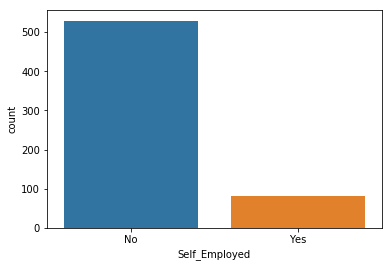

In [29]:
sns.countplot(x="Self_Employed",data=df)

### Bivariate Analysis

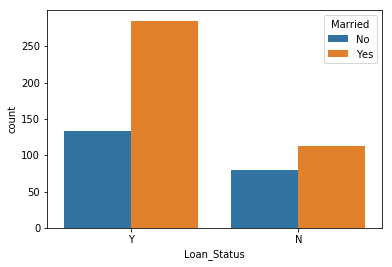

In [30]:
sns.countplot(df["Loan_Status"], hue=df["Married"])   
plt.show()

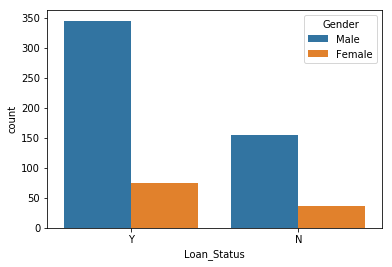

In [31]:
sns.countplot(df["Loan_Status"],hue=df["Gender"])   
plt.show()

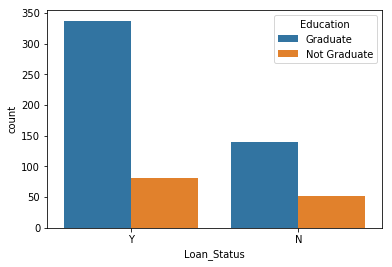

In [32]:
sns.countplot(df["Loan_Status"],hue=df["Education"])   
plt.show()

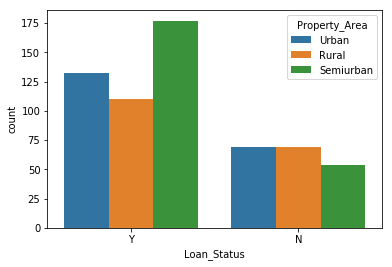

In [33]:
sns.countplot(df["Loan_Status"],hue=df["Property_Area"])   
plt.show()

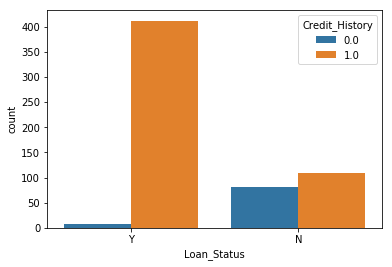

In [34]:
sns.countplot(df["Loan_Status"],hue=df["Credit_History"])   
plt.show()

Dealing with object type values we will use label encoder to encode our data and drop Loan_ID column.

In [35]:
obj_lst=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]
lab_enc= LabelEncoder()
for i in obj_lst:
    df1= lab_enc.fit_transform(df[i])
    df[i]=df1
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [42]:
df=df.drop(columns=["Loan_ID"],axis=1)

### Check for correlation

In [36]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.367926,0.172422,0.044560,-0.001284,0.061997,0.082028,0.108139,-0.082177,0.010004,-0.026958,0.019381
Married,0.367926,1.000000,0.337748,0.014223,0.005904,0.051332,0.077770,0.146981,-0.102624,0.009481,0.002918,0.089280
Dependents,0.172422,0.337748,1.000000,0.053947,0.055471,0.118901,0.028788,0.163693,-0.103619,-0.038736,0.001121,0.012593
Education,0.044560,0.014223,0.053947,1.000000,-0.011414,-0.140590,-0.063585,-0.166859,-0.073701,-0.072670,-0.064391,-0.084286
Self_Employed,-0.001284,0.005904,0.055471,-0.011414,1.000000,0.127550,-0.017019,0.115501,-0.033421,-0.000757,-0.030184,-0.002404
ApplicantIncome,0.061997,0.051332,0.118901,-0.140590,0.127550,1.000000,-0.116266,0.566037,-0.044361,-0.018900,-0.008948,-0.005154
CoapplicantIncome,0.082028,0.077770,0.028788,-0.063585,-0.017019,-0.116266,1.000000,0.188147,-0.059135,0.012093,0.011051,-0.057733
LoanAmount,0.108139,0.146981,0.163693,-0.166859,0.115501,0.566037,0.188147,1.000000,0.036135,-0.001633,-0.045145,-0.036789
Loan_Amount_Term,-0.082177,-0.102624,-0.103619,-0.073701,-0.033421,-0.044361,-0.059135,0.036135,1.000000,-0.005291,-0.077171,-0.023619
Credit_History,0.010004,0.009481,-0.038736,-0.072670,-0.000757,-0.018900,0.012093,-0.001633,-0.005291,1.000000,0.001205,0.540021


In [38]:
corr_mat=df.corr()
corr_mat["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540021
Married              0.089280
Property_Area        0.030939
Gender               0.019381
Dependents           0.012593
Self_Employed       -0.002404
ApplicantIncome     -0.005154
Loan_Amount_Term    -0.023619
LoanAmount          -0.036789
CoapplicantIncome   -0.057733
Education           -0.084286
Name: Loan_Status, dtype: float64

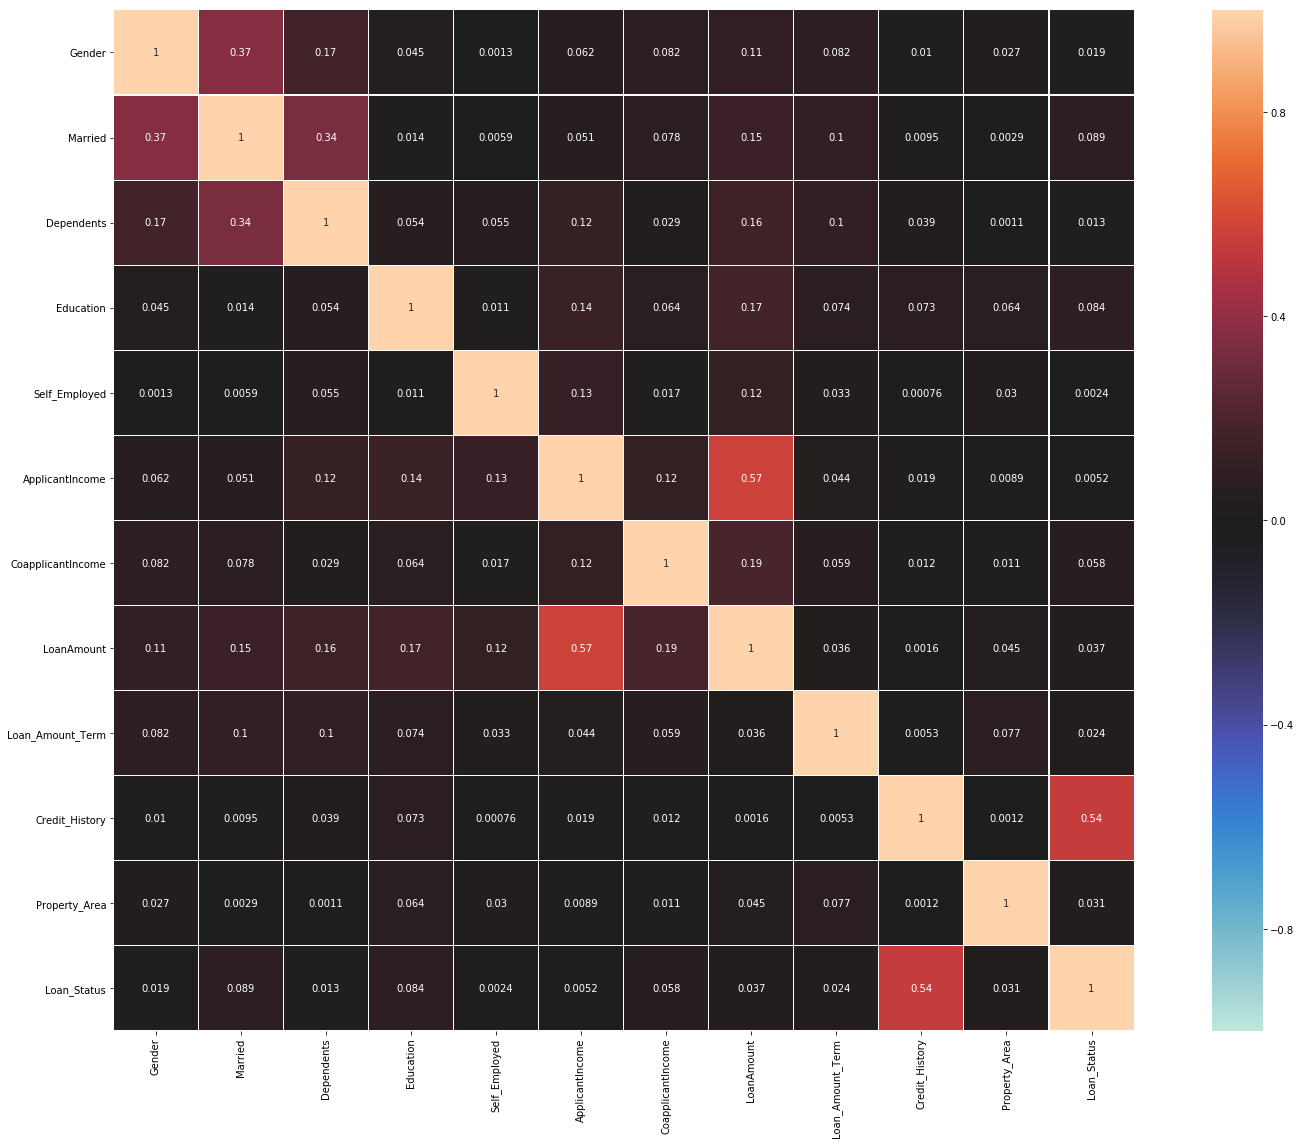

In [39]:
## HeatMap
df_corr= df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

Max correlation: Credit History

Min correlation: Self Employed

### Check for outliers

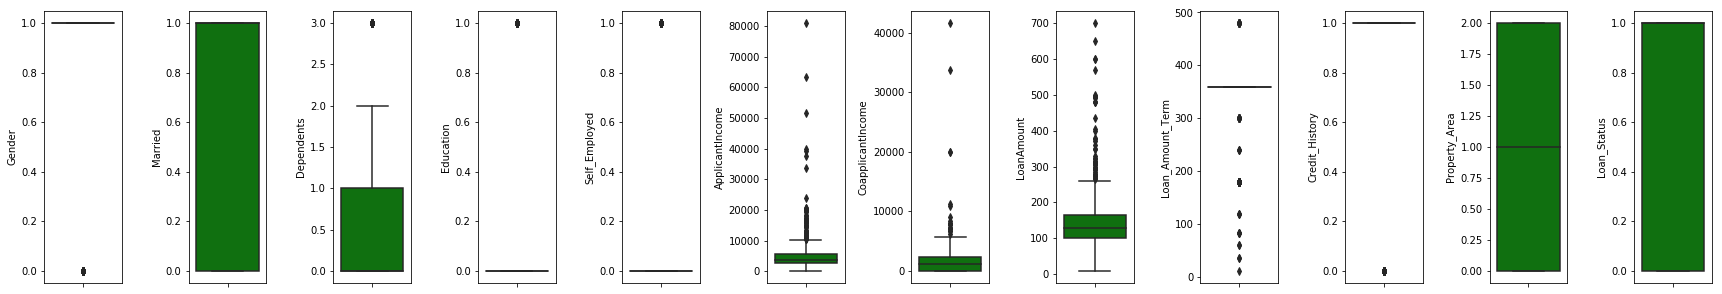

In [43]:
collist=df.columns.values
plt.figure(figsize=(30,40))
for i in range(0,len(collist)):
    plt.subplot(10,15,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

We observe outliers in Applicant Income, CoaplicantIncome, Loan Amount and Loan Amount Term

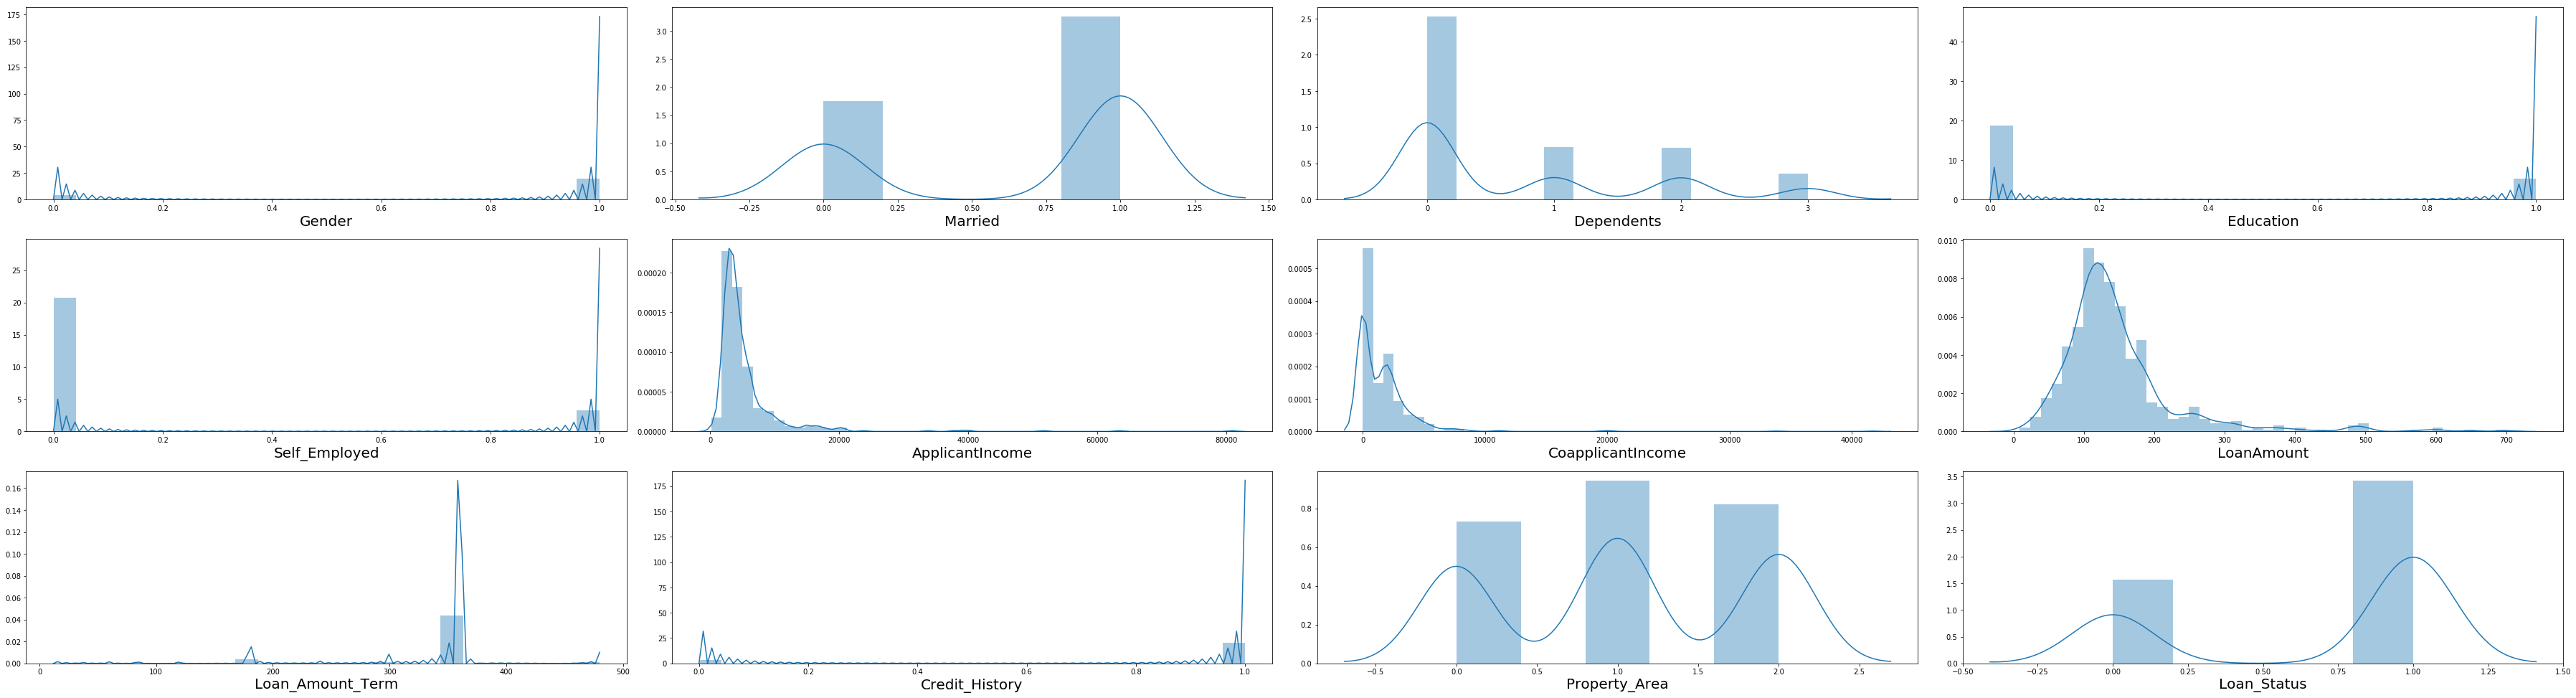

In [44]:
## checking for Normal Distribution of curve
plt.figure(figsize=(50,40),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

Data is not normally distributed and we observe skewness.

## Data Cleaning

In [47]:
delete= pd.DataFrame([[-0.00514,"ApplicantIncome","Yes","No","-"],[-0.002404,"Self_Employed","-","-",32]],columns=["Correlation","Column Namr","Normalized","Outliers","Null_Values"])
delete

,Correlation,Column Namr,Normalized,Outliers,Null_Values
0,-0.005140,ApplicantIncome,Yes,No,-
1,-0.002404,Self_Employed,-,-,32


We will drop there columns from our data as they have very less correlation

In [48]:
df=df.drop(columns=["ApplicantIncome","Self_Employed"],axis=1)

In [51]:
z=np.abs(stats.zscore(df))
index=(np.where(z>4)[0])
df_new=df.drop(df.index[index])
df_new.shape

(589, 10)

In [52]:
print("Percentage of data loss=",((614-589)/614)*100)

Percentage of data loss= 4.071661237785016


Data loss is 4% and hence we can proceed with our new data. Now we will check for skewness of data

In [53]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [54]:
x.skew()

Gender              -1.670410
Married             -0.631755
Dependents           1.031939
Education            1.326620
CoapplicantIncome    1.528378
LoanAmount           1.748560
Loan_Amount_Term    -2.237443
Credit_History      -1.990879
Property_Area       -0.042044
dtype: float64

Since we observe skewness in most of our data we will use power transform to remove it

In [55]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

## Model Building

In [56]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x)

#### Finding best random state

In [66]:
score_lr=[]
lr=LogisticRegression()
for i in range(0,500):
    x_train, x_test, y_train, y_test= train_test_split(x_scaled, y , test_size=0.25, random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    score_lr.append(accuracy_score(y_test,pred_test)*100)
score=max(score_lr)
print("Best RandomState = ",score_lr.index(score))
print("Accuracy = ",score)

Best RandomState =  63
Accuracy =  89.1891891891892


In [68]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y , test_size=0.25, random_state=63)

#### Logistic Regression

In [69]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
score_lr=accuracy_score(y_test,y_pred)
print("Logistic Regression model Score =",accuracy_score(y_test,y_pred))

Logistic Regression model Score = 0.8918918918918919


#### KNN Model

In [71]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
score_knn=accuracy_score(y_test,y_pred)
print("knn model Score =",accuracy_score(y_test,y_pred))

knn model Score = 0.8581081081081081


#### DecisionTree Classifier

In [72]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
score_dt=accuracy_score(y_test,y_pred)
print("Decision Tree model Score =",accuracy_score(y_test,y_pred))

Decision Tree model Score = 0.7702702702702703


#### Support Vector Classifier

In [73]:
svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
score_svc=accuracy_score(y_test,y_pred)
print("SVM model Score =",accuracy_score(y_test,y_pred))

SVM model Score = 0.8918918918918919


#### Using cross_val score to check for best model

In [75]:
cross_val_score(lr, x_scaled, y, cv=5)
cvs_lr=cross_val_score(LogisticRegression(), x_scaled, y, cv=5).mean()
print("Logistic Regression Cross Validation score= ",cvs_lr)

Logistic Regression Cross Validation score=  0.8166739098942489


In [77]:
cvs_knn=cross_val_score(knn, x_scaled, y, cv=5).mean()
print("KNeighborsClassifier Cross Validation score= ",cvs_knn)

KNeighborsClassifier Cross Validation score=  0.7911487758945386


In [79]:
cross_val_score(dt, x_scaled, y, cv=5)
cvs_dt=cross_val_score(DecisionTreeClassifier(), x_scaled, y, cv=5).mean()
print("DecisionTree Classifier Cross Validation score= ",cvs_dt)

DecisionTree Classifier Cross Validation score=  0.7503983775170215


In [81]:
cross_val_score(svc, x_scaled, y, cv=5)
cvs_svm=cross_val_score(SVC(), x_scaled, y, cv=5).mean()
print("SVC Cross Validation score= ",cvs_svm)

SVC Cross Validation score=  0.8149355352745185


We will now check for difference between accuracy score and cross validation score

In [82]:
print("Logistic Regression: ",(score_lr-cvs_lr))

Logistic Regression:  0.07521798199764296


In [83]:
print("KNN Model: ",(score_knn-cvs_knn))

KNN Model:  0.06695933221356953


In [84]:
print("Decision Tree: ",(score_dt-cvs_dt))

Decision Tree:  0.019871892753248743


In [85]:
print("SVM: ",(score_svc-cvs_svm))

SVM:  0.07695635661737343


From the differences we observe Decision Tree model as our best model and hence we will now move forward to tune our model. But before that we will plot ROC currve and determine ROC AUC score

### ROC AUC Curve

In [86]:
print("ROC_AUC_Score for decisiontreeClassifier= ",roc_auc_score(y_test,dt.predict(x_test)))

print("ROC_AUC_Score for Logistic Regression= ",roc_auc_score(y_test,lr.predict(x_test)))

print("ROC_AUC_Score for KNeighboursClassifier= ",roc_auc_score(y_test,knn.predict(x_test)))

print("ROC_AUC_Score for SVM= ",roc_auc_score(y_test,svc.predict(x_test)))

ROC_AUC_Score for decisiontreeClassifier=  0.7333333333333334
ROC_AUC_Score for Logistic Regression=  0.7575757575757576
ROC_AUC_Score for KNeighboursClassifier=  0.7574440052700921
ROC_AUC_Score for SVM=  0.7575757575757576


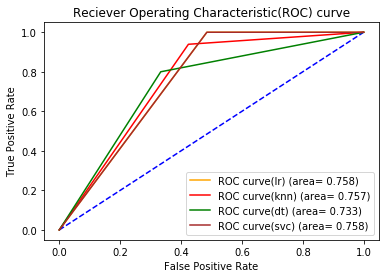

In [87]:
fpr, tpr, threshold= roc_curve(y_test,lr.predict(x_test))
plt.plot(fpr,tpr,color='orange',label='ROC curve(lr) (area= %0.3f)'%(roc_auc_score(y_test,lr.predict(x_test))))
plt.plot([0,1],[0,1], color='blue', linestyle='--')

fpr, tpr, threshold= roc_curve(y_test,knn.predict(x_test))
plt.plot(fpr,tpr,color='red', label='ROC curve(knn) (area= %0.3f)'%(roc_auc_score(y_test,knn.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,dt.predict(x_test))
plt.plot(fpr,tpr,color='green', label='ROC curve(dt) (area= %0.3f)'%(roc_auc_score(y_test,dt.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,svc.predict(x_test))
plt.plot(fpr,tpr,color='brown', label='ROC curve(svc) (area= %0.3f)'%(roc_auc_score(y_test,svc.predict(x_test))))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic(ROC) curve')
plt.legend(loc='lower right')
plt.show() 

### Hyper Parametric Tuning

In [88]:
clf=DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy'],
            'splitter':['best','random'],
           'max_depth':range(2,20,3),
           'min_samples_leaf':range(1,20,4),
           'min_samples_split':range(2,20,2)}
grid_search= GridSearchCV(estimator=clf, param_grid= grid_param, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_parameter= grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 13, 'min_samples_split': 12, 'splitter': 'random'}


In [89]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=13,min_samples_split=12,splitter='random')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8716216216216216

In [90]:
cfm =confusion_matrix(y_test,y_pred)
print("Accuracy Score :",clf.score(x_test,y_test))
print("Confusion Matrix :\n",cfm,"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))
print("\n ROC_AUC_Score for Logistic Regression= ",roc_auc_score(y_test,clf.predict(x_test)))

Accuracy Score : 0.8716216216216216
Confusion Matrix :
 [[ 17  16]
 [  0 115]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.52      0.68        33
           1       0.88      1.00      0.93       115

    accuracy                           0.89       148
   macro avg       0.94      0.76      0.81       148
weighted avg       0.91      0.89      0.88       148


 ROC_AUC_Score for Logistic Regression=  0.7445322793148881


### Saving Model

In [91]:
filename= "LoanPrediction.pickle"
pickle.dump(clf,open(filename,'wb'))